# Strategic Thinking CA1

In [40]:
# IMPORTS AND CONFIGURATIONS

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import seaborn as sns
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

# import pandas_profiling
# from pandas_profiling import ProfileReport

import glob
import os

## Data Understanding
Preprocessing a dataset through data characterisation involves summarising the features and characteristics present in the data using statistical measures and visualisations techniques such as bar charts and scatter plots. After this stage, it should be possible to identify biases, patterns, trends, and any missing or irrelevant data in the data set that may need to be addressed.

This dataset is composed by instances of eight types of undesirable events characterized by eight process variables from three different sources: real instances, simulated instances and hand-drawn instances. All real instances were taken from the plant information system that is used to monitor the industrial processes at an operational unit in Brazilian state of Espírito Santo. The simulated instances were all generated using OLGA ([Schlumberger](https://www.software.slb.com/products/olga)), a dynamic multiphase flow simulator that is widely used by oil companies worldwide (Andreolli, 2016). Finally, the hand-drawn instances were generated by a specific tool developed by Petrobras researchers for this dataset to incorporate undesirable events classfied as rare. 
 
### Data Characterisation
The data consists of over 50 million observations, with 13 columns of data for each observation. The first column, `label`, indicates the event type for each observation. The second column, `well`, contains the name of the well the observation was taken from. Hand-drawn and simulated instances have fixed names for in this column, while real instances have names masked with incremental id. The third column, `id`, is an identifier for the observation and it is incremental for hand-drawn and simulated instances, while each real instance has an id generated from its first timestamp. The columns representing the process variables are:

* P-PDG: pressure variable at the Permanent Downhole Gauge (PDG);
* P-TPT: pressure variable at the Temperature and Pressure Transducer (TPT);
* T-TPT: temperature variable at the Temperature and Pressure Transducer (TPT);
* P-MON-CKP: pressure variable upstream of the production choke (CKP);
* T-JUS-CKP: temperature variable downstream of the production choke (CKP);
* P-JUS-CKGL: pressure variable upstream of the gas lift choke (CKGL);
* T-JUS-CKGL: temperature variable upstream of the gas lift choke (CKGL);
* QGL: gas lift flow rate;

The pressure features are measured in Pascal (Pa), the volumetric flow rate features are measured in standard cubic meters per second (SCM/s), and the temperature features are measured in degrees Celsius (°C). Finally `class` label can be used to identify periods of normal operation, fault transients, and faulty steady states, which can help with diagnosis and maintenance. 

In [5]:
df = pd.read_csv('3Wdataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50822124 entries, 0 to 50822123
Data columns (total 12 columns):
 #   Column      Dtype  
---  ------      -----  
 0   label       int64  
 1   well        object 
 2   id          int64  
 3   P-PDG       float64
 4   P-TPT       float64
 5   T-TPT       float64
 6   P-MON-CKP   float64
 7   T-JUS-CKP   float64
 8   P-JUS-CKGL  float64
 9   T-JUS-CKGL  float64
 10  QGL         float64
 11  class       float64
dtypes: float64(9), int64(2), object(1)
memory usage: 4.5+ GB


In [6]:
df.head()

,label,well,id,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,T-JUS-CKGL,QGL,class
0,0,WELL-00001,20170201020207,0.0,10092110.0,119.0944,1609800.0,84.59782,1564147.0,NaN,0.0,0.0
1,0,WELL-00001,20170201020207,0.0,10092000.0,119.0944,1618206.0,84.58997,1564148.0,NaN,0.0,0.0
2,0,WELL-00001,20170201020207,0.0,10091890.0,119.0944,1626612.0,84.58213,1564148.0,NaN,0.0,0.0
3,0,WELL-00001,20170201020207,0.0,10091780.0,119.0944,1635018.0,84.57429,1564148.0,NaN,0.0,0.0
4,0,WELL-00001,20170201020207,0.0,10091670.0,119.0944,1643424.0,84.56644,1564148.0,NaN,0.0,0.0


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
label,50822124.0,3.387997e+00,2.526282e+00,0.000000e+00,1.000000e+00,4.000000e+00,5.000000e+00,8.000000e+00
id,50822124.0,5.536792e+12,9.000317e+12,1.000000e+00,4.300000e+01,1.290000e+02,2.014032e+13,2.018062e+13
P-PDG,50816249.0,-4.923179e+39,7.606369e+40,-1.180116e+42,1.161616e+07,2.189268e+07,2.605564e+07,4.485805e+07
P-TPT,50815940.0,1.467257e+07,4.379132e+07,0.000000e+00,1.099830e+07,1.452439e+07,1.755830e+07,2.941990e+09
T-TPT,45011148.0,1.044371e+02,2.727372e+01,0.000000e+00,9.697665e+01,1.167546e+02,1.217072e+02,1.277401e+02
P-MON-CKP,49700496.0,3.587708e+06,3.354934e+06,-8.317492e+03,1.186575e+06,1.963778e+06,5.116738e+06,1.303717e+07
T-JUS-CKP,49210426.0,7.559043e+01,2.147815e+01,-2.020000e+00,6.702149e+01,7.735565e+01,8.478074e+01,1.730961e+02
P-JUS-CKGL,10007488.0,4.052477e+06,5.221975e+06,-4.976717e+05,2.312238e+06,2.332198e+06,3.430441e+06,2.106982e+07
T-JUS-CKGL,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
QGL,10691260.0,1.694197e-01,4.591983e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.146513e+00


In order to maintain the realistic aspects of the data, the dataset was extracted without preprocessing, including the presence of `NaN` values, frozen variables due to sensor or communication issues, instances with varying sizes, and outliers (R.E.V. Vargas, et al. 2019). 

From all 50,822,124 entries, 3,086,851 are duplicated, that is, approximately 6.07% of total. These duplicated rows may be related to frozen variables from real instances, as simulated and hand-drawn instances are naturally free of such problems. Although no missing values were found for columns `label`, `well`, and `id`, other features presented null or absent values. Notably, the column `T-JUS-CKGL` turned out to be completely empty.

In [8]:
# Counting duplicated rows
df.duplicated().sum()

3086851

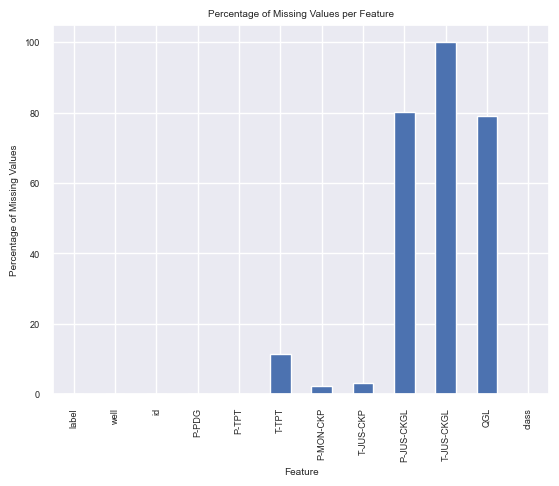

In [49]:
# Finding missing values
# df.isnull().sum()
missing = df.isnull()

# Calculate the proportion of missing values for each feature
missing_proportion = missing_values / len(df)

# Convert the proportions to percentages
missing_percentages = missing_proportion * 100

# Create the bar plot
missing_percentages.plot(kind='bar', title='Percentage of Missing Values per Feature')
plt.xlabel('Feature')
plt.ylabel('Percentage of Missing Values')
plt.show()

### Exploratory Data Analysis
There are 9 different labels in the dataset, with the majority of the data (13.2 million points) having a label of "Rapid Productivity Loss". The second most common label is "Normal", which is present in around 9.9 million data points. The remaining labels are present in smaller amounts, with the least common label being "Spurious Closure of DHSV" which is present in around 619,464 data points. See below a table with more details about each label and a bar chart describing how they are distributed:

In [28]:
label_counts = df['label'].value_counts()

# dictionary that maps labels to descriptions
label_descriptions = {
    0: 'Normal state',
    1: 'Abrupt Increase of BSW',
    2: 'Spurious Closure of DHSV',
    3: 'Severe Slugging',
    4: 'Flow Instability',
    5: 'Rapid Productivity Loss',
    6: 'Quick Restriction in PCK',
    7: 'Scaling in PCK',
    8: 'Hydrate in Production Line'
}

data = []
total_count = label_counts.sum()
for label, count in label_counts.items():
    description = label_descriptions[label]
    proportion = '{:.1%}'.format(count / total_count)    
    data.append((label, description, count, proportion))

df_table = pd.DataFrame(data, columns=['Label', 'Description', 'Value', 'Proportion (%)'])
df_table

,Label,Description,Value,Proportion (%)
0,5,Rapid Productivity Loss,13224267,26.0%
1,0,Normal state,9956791,19.6%
2,1,Abrupt Increase of BSW,8988607,17.7%
3,6,Quick Restriction in PCK,5859002,11.5%
4,3,Severe Slugging,4834079,9.5%
5,7,Scaling in PCK,2690918,5.3%
6,4,Flow Instability,2462076,4.8%
7,8,Hydrate in Production Line,2186920,4.3%
8,2,Spurious Closure of DHSV,619464,1.2%


Text(0, 0.5, 'Count (Millions)')

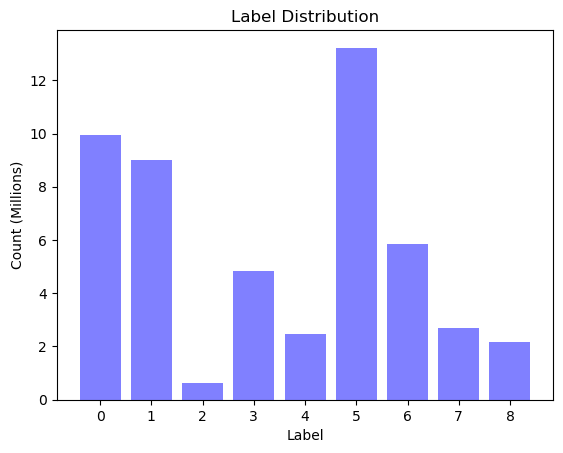

In [37]:
label_counts = df['label'].value_counts()
label_names = label_counts.index
label_values = label_counts.values / 1000000
plt.bar(label_names, label_values, color='#8080FF')
plt.xticks(range(9), range(9))
# plt.xticks(label_names, [label_descriptions[x] for x in label_names])
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count (Millions)')

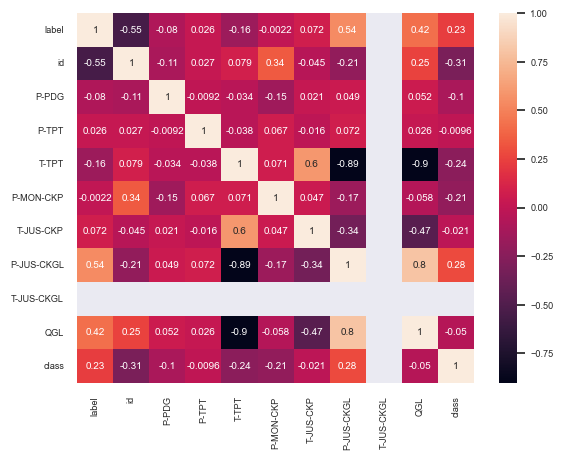

In [43]:
# Computing the correlations
corr = df.corr()
sns.set(font_scale=0.6)
sns.heatmap(corr, annot=True)
plt.show()

The heatmap above shows the correlation between all numerical features in a single graph. Overall, the `T-TPT` feature has very strong negative correlations with the features `P-JUS-CKGL` (-0.89) and `QGL` (-0.9). Also, `T-TPT` presents a strong positive correlation with `T-JUS-CKP` (0.6). In turn, `P-JUS-CKGL` has a strong positive correlation with `QGL` (0.8) and a moderate positive correlation with feature `label` (0.52). The `QGL` feature has also a moderate correlation with the `label` (0.42) and a moderate negative correlation with `T-JUS-CKP` (0.47)

It's worth noting that the correlations are only one aspect to consider when analyzing the relationships between features in a dataset. It's also important to consider other factors such as the distribution of the data, the presence of outliers, and the underlying relationships between the features.

In [47]:
corr

,label,id,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,T-JUS-CKGL,QGL,class
label,1.000000,-0.545374,-0.080235,0.025525,-0.163782,-0.002240,0.072275,0.544360,NaN,0.423038,0.230954
id,-0.545374,1.000000,-0.105331,0.026882,0.079497,0.341243,-0.045431,-0.210094,NaN,0.251987,-0.313421
P-PDG,-0.080235,-0.105331,1.000000,-0.009157,-0.034100,-0.147454,0.020970,0.048646,NaN,0.052475,-0.102325
P-TPT,0.025525,0.026882,-0.009157,1.000000,-0.038440,0.067236,-0.016421,0.072495,NaN,0.025579,-0.009613
T-TPT,-0.163782,0.079497,-0.034100,-0.038440,1.000000,0.071494,0.596442,-0.894958,NaN,-0.901017,-0.239017
P-MON-CKP,-0.002240,0.341243,-0.147454,0.067236,0.071494,1.000000,0.047093,-0.165695,NaN,-0.057811,-0.210060
T-JUS-CKP,0.072275,-0.045431,0.020970,-0.016421,0.596442,0.047093,1.000000,-0.337041,NaN,-0.466060,-0.021293
P-JUS-CKGL,0.544360,-0.210094,0.048646,0.072495,-0.894958,-0.165695,-0.337041,1.000000,NaN,0.803228,0.283574
T-JUS-CKGL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
QGL,0.423038,0.251987,0.052475,0.025579,-0.901017,-0.057811,-0.466060,0.803228,NaN,1.000000,-0.050371


## Data Preparation

In [6]:
df = df.drop(columns=['T-JUS-CKGL']) #100% NaN

In [7]:
df.head()

,label,well,id,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,QGL,class
0,0,WELL-00001,20170201020207,0.0,10092110.0,119.0944,1609800.0,84.59782,1564147.0,0.0,0.0
1,0,WELL-00001,20170201020207,0.0,10092000.0,119.0944,1618206.0,84.58997,1564148.0,0.0,0.0
2,0,WELL-00001,20170201020207,0.0,10091890.0,119.0944,1626612.0,84.58213,1564148.0,0.0,0.0
3,0,WELL-00001,20170201020207,0.0,10091780.0,119.0944,1635018.0,84.57429,1564148.0,0.0,0.0
4,0,WELL-00001,20170201020207,0.0,10091670.0,119.0944,1643424.0,84.56644,1564148.0,0.0,0.0


Remove duplicate rows

In [8]:
df.drop_duplicates(inplace = True, ignore_index = True)

In [9]:
df.shape

(47735273, 11)

In [10]:
df_nonulls = df.dropna()

In [11]:
df_nonulls.shape

(9955876, 11)

In [12]:
#report = create_report(df_nonulls)
#report.save('3W Dataset EDA Report - No Null Values')

In [13]:
df_nonulls.describe()

,label,id,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,QGL,class
count,9.955876e+06,9.955876e+06,9.955876e+06,9.955876e+06,9.955876e+06,9.955876e+06,9.955876e+06,9.955876e+06,9.955876e+06,9.955876e+06
mean,1.075626e+00,2.016677e+13,-2.505632e+40,1.643428e+07,1.116069e+02,4.426371e+06,7.765858e+01,4.071639e+06,9.927879e-02,7.705904e+00
std,1.934351e+00,1.096420e+10,1.701222e+41,9.796013e+07,1.807550e+01,3.668974e+06,3.272353e+01,5.223427e+06,3.677854e-01,2.614636e+01
min,0.000000e+00,2.013110e+13,-1.180116e+42,0.000000e+00,0.000000e+00,7.678105e+05,-2.020000e+00,-4.976717e+05,0.000000e+00,0.000000e+00
25%,0.000000e+00,2.017022e+13,0.000000e+00,8.478569e+06,1.165482e+02,1.641370e+06,6.871674e+01,2.313912e+06,0.000000e+00,0.000000e+00
50%,0.000000e+00,2.017053e+13,0.000000e+00,1.385396e+07,1.171824e+02,2.467567e+06,7.373584e+01,2.332347e+06,0.000000e+00,0.000000e+00
75%,1.000000e+00,2.017082e+13,2.353645e+07,1.653820e+07,1.178883e+02,6.151561e+06,7.852245e+01,3.440053e+06,0.000000e+00,0.000000e+00
max,7.000000e+00,2.018062e+13,4.485805e+07,2.941990e+09,1.196061e+02,1.235933e+07,1.730961e+02,2.106982e+07,4.146513e+00,1.070000e+02


Count rows by label (the label column is the class of the event in this dataset)

In [14]:
df_nonulls = df_nonulls.reset_index()

In [15]:
df_nonulls.groupby(by='label').agg('count')

,index,well,id,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,QGL,class
label,,,,,,,,,,,
0,7357719,7357719,7357719,7357719,7357719,7357719,7357719,7357719,7357719,7357719,7357719
1,117065,117065,117065,117065,117065,117065,117065,117065,117065,117065,117065
2,15760,15760,15760,15760,15760,15760,15760,15760,15760,15760,15760
3,568352,568352,568352,568352,568352,568352,568352,568352,568352,568352,568352
4,1218415,1218415,1218415,1218415,1218415,1218415,1218415,1218415,1218415,1218415,1218415
5,360537,360537,360537,360537,360537,360537,360537,360537,360537,360537,360537
6,47386,47386,47386,47386,47386,47386,47386,47386,47386,47386,47386
7,270642,270642,270642,270642,270642,270642,270642,270642,270642,270642,270642


Select rows where label is either 0 (Normal) or 4 (Flow Instability)

In [16]:
df = df_nonulls.loc[df_nonulls['label'].isin([0, 4])]

In [17]:
df.head()

,index,label,well,id,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,QGL,class
0,0,0,WELL-00001,20170201020207,0.0,10092110.0,119.0944,1609800.0,84.59782,1564147.0,0.0,0.0
1,1,0,WELL-00001,20170201020207,0.0,10092000.0,119.0944,1618206.0,84.58997,1564148.0,0.0,0.0
2,2,0,WELL-00001,20170201020207,0.0,10091890.0,119.0944,1626612.0,84.58213,1564148.0,0.0,0.0
3,3,0,WELL-00001,20170201020207,0.0,10091780.0,119.0944,1635018.0,84.57429,1564148.0,0.0,0.0
4,4,0,WELL-00001,20170201020207,0.0,10091670.0,119.0944,1643424.0,84.56644,1564148.0,0.0,0.0


Replace label (target variable/class) value = 4 with 1

In [18]:
df.loc[df['label'] == 4, 'label'] = 1

In [19]:
df.groupby(by='label').agg('count')

,index,well,id,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,QGL,class
label,,,,,,,,,,,
0,7357719,7357719,7357719,7357719,7357719,7357719,7357719,7357719,7357719,7357719,7357719
1,1218415,1218415,1218415,1218415,1218415,1218415,1218415,1218415,1218415,1218415,1218415


In [20]:
df.head()

,index,label,well,id,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,QGL,class
0,0,0,WELL-00001,20170201020207,0.0,10092110.0,119.0944,1609800.0,84.59782,1564147.0,0.0,0.0
1,1,0,WELL-00001,20170201020207,0.0,10092000.0,119.0944,1618206.0,84.58997,1564148.0,0.0,0.0
2,2,0,WELL-00001,20170201020207,0.0,10091890.0,119.0944,1626612.0,84.58213,1564148.0,0.0,0.0
3,3,0,WELL-00001,20170201020207,0.0,10091780.0,119.0944,1635018.0,84.57429,1564148.0,0.0,0.0
4,4,0,WELL-00001,20170201020207,0.0,10091670.0,119.0944,1643424.0,84.56644,1564148.0,0.0,0.0


In [21]:
df = df.drop(columns=['well','id', 'class','index'])

In [22]:
df.head()

,label,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,QGL
0,0,0.0,10092110.0,119.0944,1609800.0,84.59782,1564147.0,0.0
1,0,0.0,10092000.0,119.0944,1618206.0,84.58997,1564148.0,0.0
2,0,0.0,10091890.0,119.0944,1626612.0,84.58213,1564148.0,0.0
3,0,0.0,10091780.0,119.0944,1635018.0,84.57429,1564148.0,0.0
4,0,0.0,10091670.0,119.0944,1643424.0,84.56644,1564148.0,0.0


In [23]:
df.shape

(8576134, 8)

Moving label to last column in dataframe

In [24]:
df = df.reindex(columns = [col for col in df.columns if col != 'label'] + ['label'])
df.head()

,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,QGL,label
0,0.0,10092110.0,119.0944,1609800.0,84.59782,1564147.0,0.0,0
1,0.0,10092000.0,119.0944,1618206.0,84.58997,1564148.0,0.0,0
2,0.0,10091890.0,119.0944,1626612.0,84.58213,1564148.0,0.0,0
3,0.0,10091780.0,119.0944,1635018.0,84.57429,1564148.0,0.0,0
4,0.0,10091670.0,119.0944,1643424.0,84.56644,1564148.0,0.0,0


## Splitting the data

In [25]:
# Store first 7 columns in an array X 
X = df.iloc[:,:7]

# Store the target variable as lable into an array y
y = df.iloc[:,7]

# Display number of rows and columns
X.shape, y.shape

((8576134, 7), (8576134,))

In [26]:
print(X,y)

              P-PDG       P-TPT      T-TPT  P-MON-CKP  T-JUS-CKP  P-JUS-CKGL  \
0               0.0  10092110.0  119.09440  1609800.0   84.59782   1564147.0   
1               0.0  10092000.0  119.09440  1618206.0   84.58997   1564148.0   
2               0.0  10091890.0  119.09440  1626612.0   84.58213   1564148.0   
3               0.0  10091780.0  119.09440  1635018.0   84.57429   1564148.0   
4               0.0  10091670.0  119.09440  1643424.0   84.56644   1564148.0   
...             ...         ...        ...        ...        ...         ...   
9277306  23431750.0  14057160.0   55.87810  2719991.0   37.73759  20036100.0   
9277307  23431840.0  14057130.0   55.87783  2720824.0   37.73744  20036350.0   
9277308  23431600.0  14056910.0   55.87774  2721658.0   37.73729  20036590.0   
9277309  23431360.0  14056680.0   55.87765  2722491.0   37.73713  20036830.0   
9277310  23431290.0  14056650.0   55.87778  2721961.0   37.73698  20037070.0   

              QGL  
0        0.000000  

In [27]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier       # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split  # Import train_test_split function
from sklearn import metrics                           # Import scikit-learn metrics module for accuracy calculation
from sklearn import tree

import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

## Balancing

In [28]:
from collections import Counter

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)

X_resampled, y_resampled = rus.fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))

#X_resampled, y_resampled = SMOTE(sampling_strategy= 0.7, n_jobs= -1, random_state=42).fit_resample(X, y)
#print(sorted(Counter(y_resampled).items()))
X_resampled.shape, y_resampled.shape 
#[(0, 4674), (1, 4674), (2, 4674)]

#X_resampled, y_resampled = ADASYN().fit_resample(X, y)
#print(sorted(Counter(y_resampled).items()))
#[(0, 4673), (1, 4662), (2, 4674)]
#clf_adasyn = LinearSVC().fit(X_resampled, y_resampled)

[(0, 1218415), (1, 1218415)]


((2436830, 7), (2436830,))

In [29]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

# Split the dataset (X, y) into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.20, random_state = 82)

# Display rows and columns
X_train.shape, X_test.shape

((1949464, 7), (487366, 7))

In [30]:
# Feature Scaling to bring the variable in a single scale
from sklearn.preprocessing import StandardScaler, MaxAbsScaler

# Create an initialise an object sc by calling a method StandardScaler()
sc = StandardScaler()

# Train the model by calling a method fit_transform
X_train = sc.fit_transform(X_train)

# Store the transformed data into X_test
X_test = sc.transform(X_test)

In [31]:
# Fitting Naive Bayes Classification to the Training set with linear kernel
from sklearn.naive_bayes import GaussianNB

# Create an initialise an object 'nvclassifier' by calling a method 'GaussianNB()'
nvclassifier = GaussianNB()

# Call fit() method for training the dataset
nvclassifier.fit(X_train, y_train)

GaussianNB()

In [32]:
# Predicting the Test set results
y_pred = nvclassifier.predict(X_test)

# Display the predicted values
print(y_pred)

[1 1 0 ... 0 0 1]


In [33]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [34]:
# Check the actual and predicted value side by side
y_compare = np.vstack((y_test,y_pred)).T
# actual value on the left side and predicted value on the right hand side
# printing the top 10 values
y_compare[:10,:]

array([[1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0]], dtype=int64)

In [35]:
# Model Accuracy, how often is the classifier correct?
# In case of any errors, install conda install python-graphviz     on the command line
from sklearn.metrics import classification_report

# Display the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90    243913
           1       0.99      0.79      0.88    243453

    accuracy                           0.89    487366
   macro avg       0.91      0.89      0.89    487366
weighted avg       0.91      0.89      0.89    487366



In [36]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8888966403072844


[[241971   1942]
 [ 52206 191247]] (2, 2)


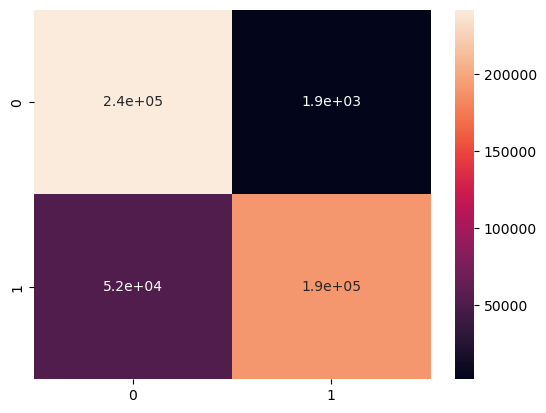

In [37]:
# Construct the Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create and initialise an object 'cm' by calling a method 'confusion_matrix()'
cm = confusion_matrix(y_test, y_pred)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)

print(cm, cm.shape)

Cross Validation

In [38]:
from sklearn.model_selection import cross_val_score

# Create an initialise an object 'nvclassifier' by calling a method 'GaussianNB()'
nvclassifier = GaussianNB()

X_resampled = sc.fit_transform(X_resampled)

# Calculate the score using cross validation method
cross_val_score(nvclassifier, X_resampled, y_resampled, scoring = 'accuracy')

array([0.49621845, 0.95960531, 0.99596812, 0.99609329, 0.61535273])

In [39]:
from sklearn.svm import LinearSVC

clf = LinearSVC().fit(X_train, y_train)

In [40]:
y_pred = clf.predict(X_test)

In [41]:
# Model Accuracy, how often is the classifier correct?
# In case of any errors, install conda install python-graphviz     on the command line
from sklearn.metrics import classification_report

# Display the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93    243913
           1       0.94      0.92      0.93    243453

    accuracy                           0.93    487366
   macro avg       0.93      0.93      0.93    487366
weighted avg       0.93      0.93      0.93    487366



In [42]:
clf = LinearSVC()
cross_val_score(clf, X_resampled, y_resampled, scoring = 'accuracy')

array([0.49625948, 0.93316932, 0.95553034, 0.96746388, 0.96743105])

[[229588  14325]
 [ 19540 223913]] (2, 2)


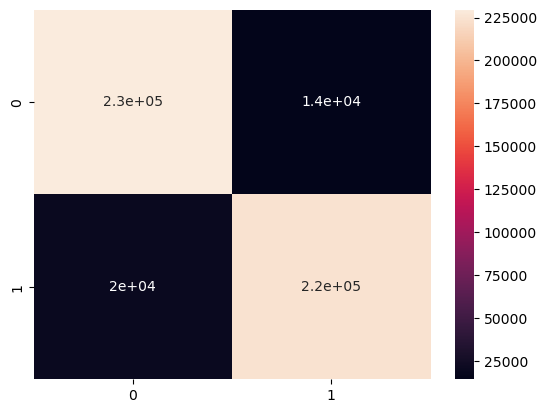

In [43]:
# Construct the Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create and initialise an object 'cm' by calling a method 'confusion_matrix()'
cm = confusion_matrix(y_test, y_pred)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)

print(cm, cm.shape)

3; 4; 5; 6; 7; 8; 9; 

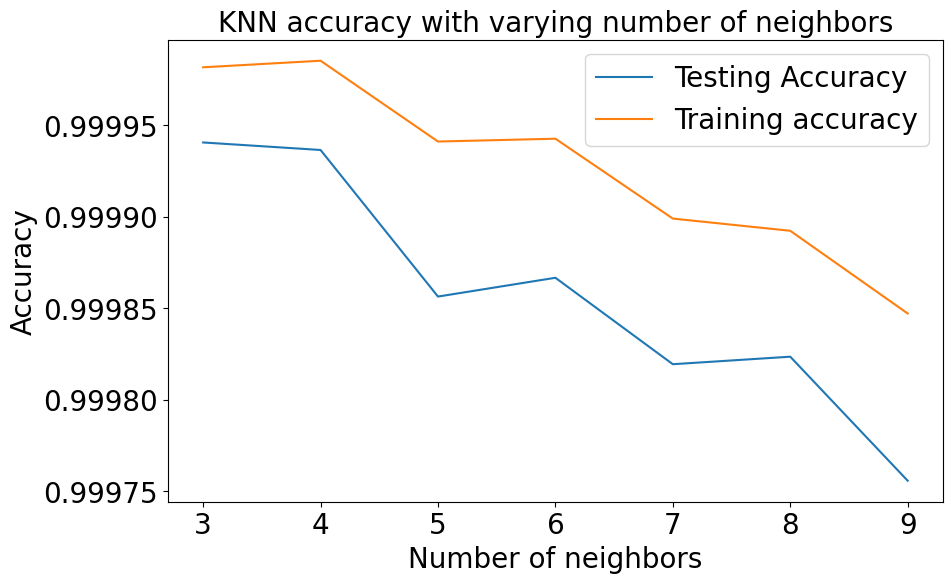

In [53]:
# Hyperparametrization - WARNING: this part may take some time.
from sklearn.neighbors import KNeighborsClassifier

neighbors = np.arange(3, 10, 1)   
train_accuracy = np.zeros(len(neighbors))    
test_accuracy = np.zeros(len(neighbors))    

for i, k in enumerate(neighbors):                         
    print(k, end="; ")
    kNN = KNeighborsClassifier(n_neighbors = k, weights='uniform')           
    kNN.fit(X_train, y_train)                             
    train_accuracy[i] = kNN.score(X_train, y_train)       
    test_accuracy[i] = kNN.score(X_test, y_test)          
    
plt.figure(figsize = (10, 6))
plt.title('KNN accuracy with varying number of neighbors', fontsize = 20)
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training accuracy')
plt.legend(prop={'size': 20})
plt.xlabel('Number of neighbors', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [54]:
# modeling after setting hyperparam ("sweet spot")
from sklearn.neighbors import KNeighborsClassifier
kNN = KNeighborsClassifier(n_neighbors = 3, weights='uniform')
kNN.fit(X_train, y_train)

score = kNN.score(X_train, y_train)
y_pred = kNN.predict(X_test)

print("Score: ", score)
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))

Score:  0.999981533385587
Accuracy:  0.9999404964646693


In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    243913
           1       1.00      1.00      1.00    243453

    accuracy                           1.00    487366
   macro avg       1.00      1.00      1.00    487366
weighted avg       1.00      1.00      1.00    487366



[[243885     28]
 [     1 243452]] (2, 2)


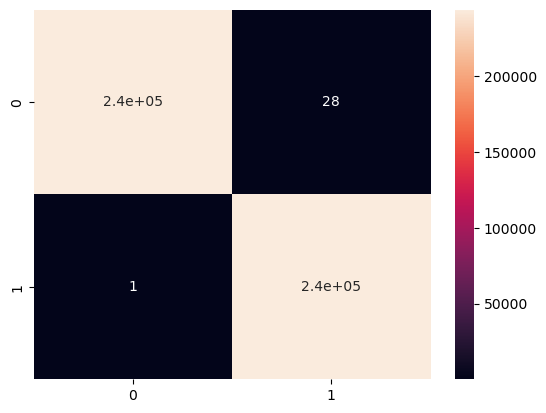

In [56]:
# Construct the Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create and initialise an object 'cm' by calling a method 'confusion_matrix()'
cm = confusion_matrix(y_test, y_pred)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)

print(cm, cm.shape)

In [57]:
clf = KNeighborsClassifier()
cross_val_score(clf, X_resampled, y_resampled, scoring = 'accuracy')

array([0.66028406, 0.91890899, 0.9858833 , 0.99986458, 0.69343984])